# By Hussain B. 

www.linkedin.com/in/hussainbagasrawala

www.github.com/ihussainb/AI-Ethics-Project

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the dataset
file_path = "Survey on AI and Personalized Advertising Ethics (Responses) - Form responses 1.csv"
df = pd.read_csv(file_path)

In [3]:
# Rename columns to correct extra spaces
df.columns = [col.strip() for col in df.columns]

In [4]:
# Set style
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 16, 'axes.labelsize': 14})

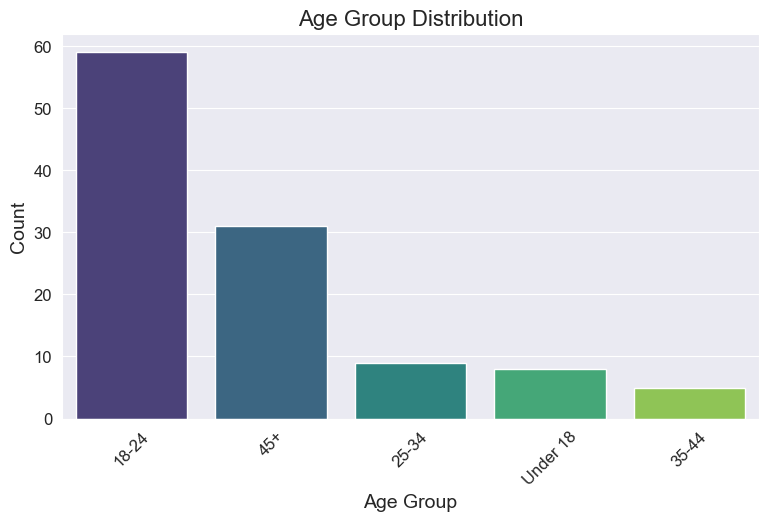

In [5]:
# 1. Distribution of Age Groups
plt.figure(figsize=(9, 5))
sns.countplot(x=df["Q1: What is your age group?"], 
              order=df["Q1: What is your age group?"].value_counts().index, 
              palette="viridis")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

This chart shows the distribution of respondents by age group. It helps identify which age group is most represented in the survey and whether the responses are biased toward a particular demographic.

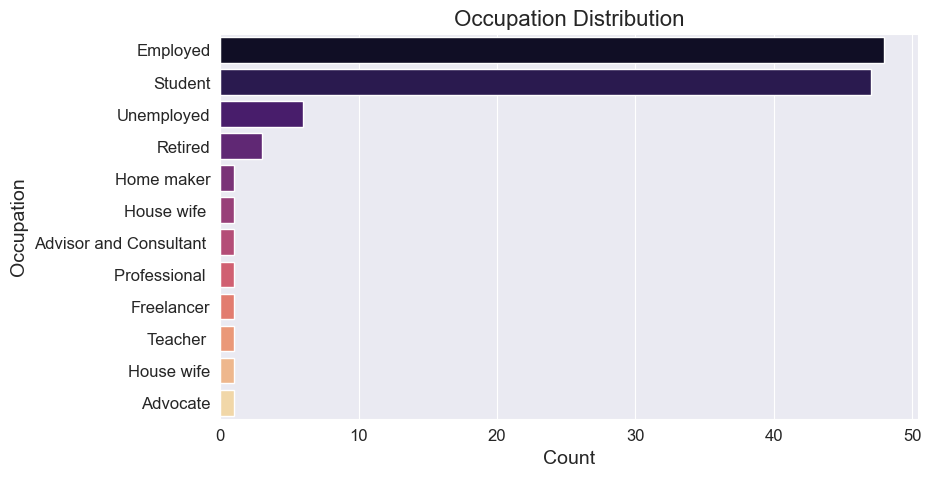

In [6]:
# 2. Occupation Distribution
plt.figure(figsize=(9, 5))
sns.countplot(y=df["Q2: What is your occupation?"], 
              order=df["Q2: What is your occupation?"].value_counts().index, 
              palette="magma")
plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

The occupation distribution visualizes the professional background of respondents. This helps in understanding if specific occupations influence perspectives on AI and personalized ads.

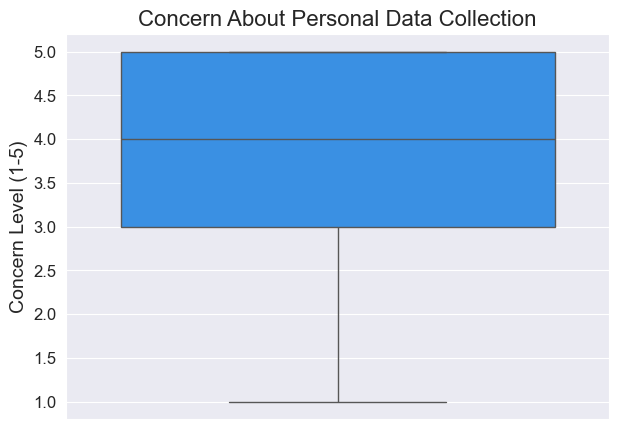

In [8]:
# 3. Concern Level About Personal Data Collection (Box Plot)
plt.figure(figsize=(7, 5))
sns.boxplot(y=df["Q7: How concerned are you about the amount of personal data companies collect to show personalized ads?"], 
            color="dodgerblue")
plt.title("Concern About Personal Data Collection")
plt.ylabel("Concern Level (1-5)")
plt.show()

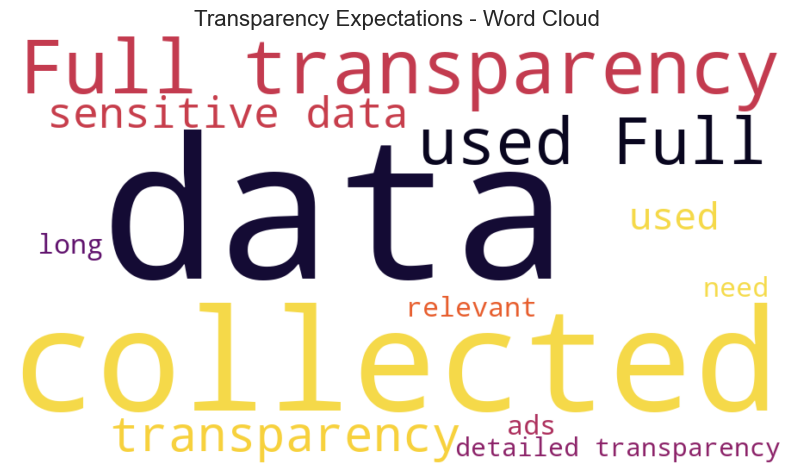

In [9]:
# 4. Word Cloud of Transparency Expectations
text_data = " ".join(df["Q10: What level of transparency do you expect from companies that use AI for personalized advertising?"].dropna().astype(str))
wordcloud = WordCloud(width=900, height=500, background_color="white", colormap="inferno").generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Transparency Expectations - Word Cloud")
plt.show()

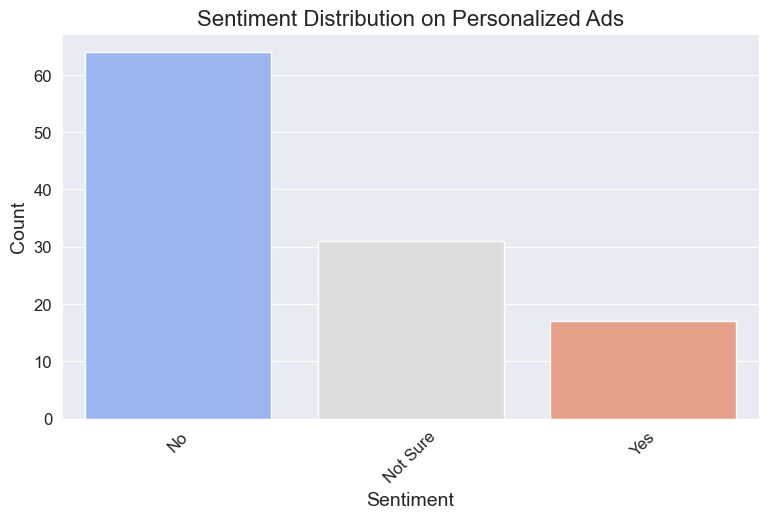

In [10]:
# 5. Sentiment Distribution on Personalized Ads
plt.figure(figsize=(9, 5))
sns.countplot(x=df["Q9: When encountering personalized ads, do you feel you’ve given sufficient consent for your data to be used?"], 
              order=df["Q9: When encountering personalized ads, do you feel you’ve given sufficient consent for your data to be used?"].value_counts().index, 
              palette="coolwarm")
plt.title("Sentiment Distribution on Personalized Ads")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

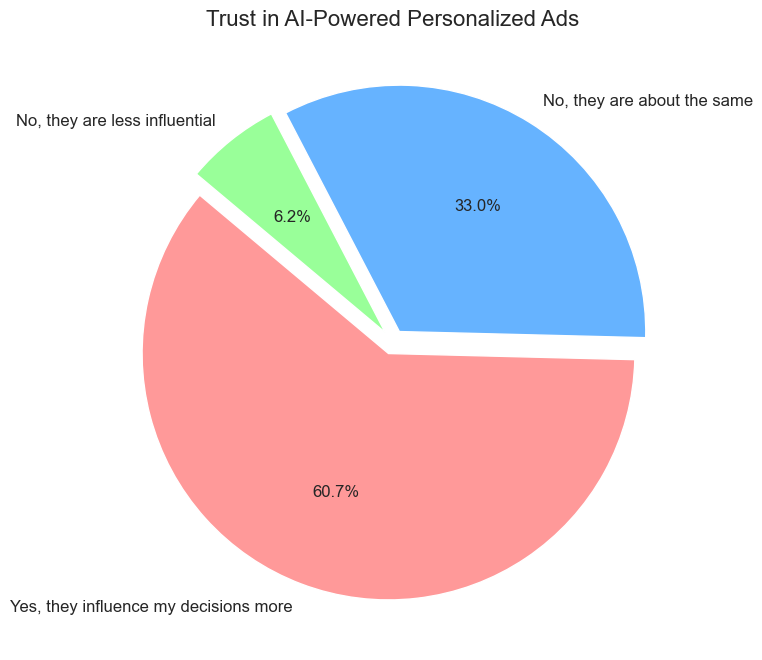

In [11]:
# 6. Pie Chart for Trust in AI-Powered Ads
plt.figure(figsize=(8, 8))
df["Q12: Do you think personalized ads are more persuasive than traditional ads?"].value_counts().plot.pie(
    autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99"], startangle=140, explode=[0.05, 0.05, 0.05])
plt.title("Trust in AI-Powered Personalized Ads")
plt.ylabel("")
plt.show()

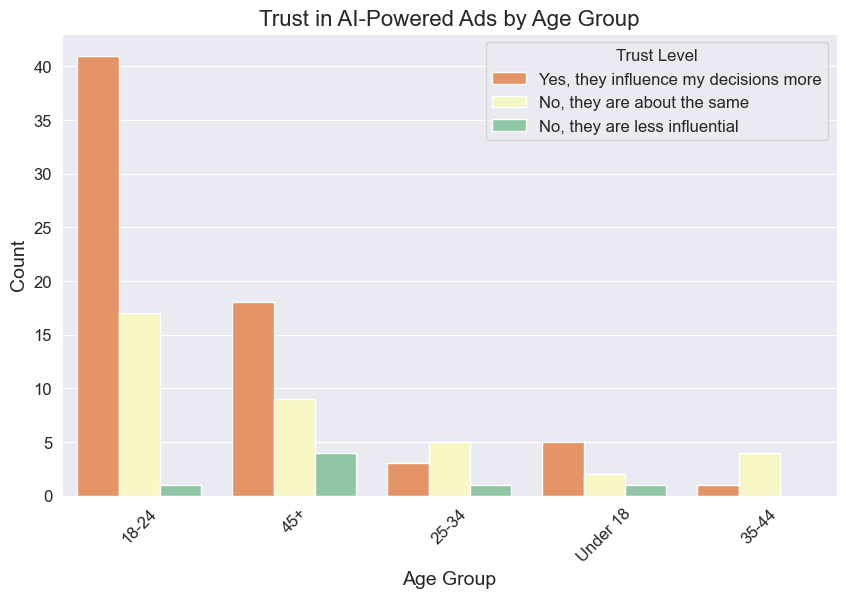

In [12]:
# 7. Relationship Between Age and Trust in AI-Powered Ads
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Q1: What is your age group?"], hue=df["Q12: Do you think personalized ads are more persuasive than traditional ads?"], palette="Spectral")
plt.title("Trust in AI-Powered Ads by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Trust Level")
plt.show()

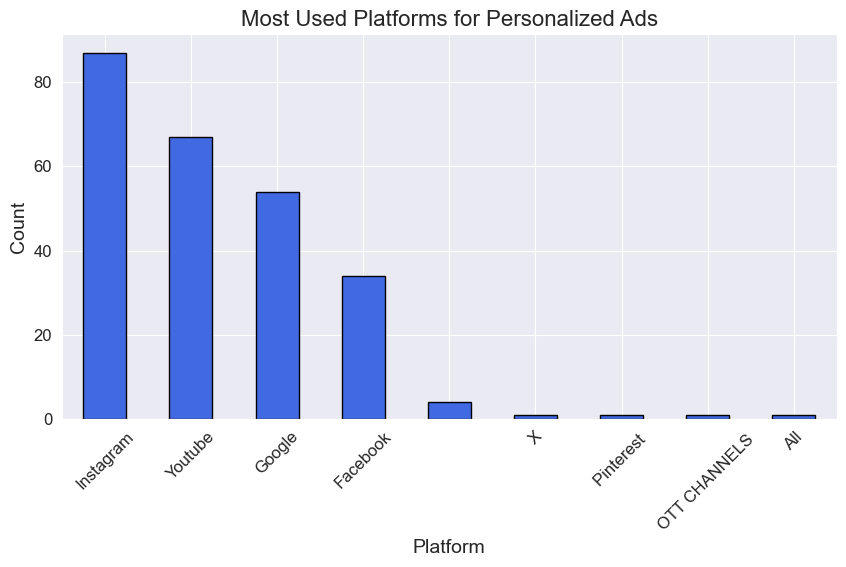

In [13]:
# 8. Bar Chart for Most Used Ad Platforms
plt.figure(figsize=(10, 5))
platform_counts = df["Q5: Which platforms do you see personalized ads on the most? (Select all that apply)"].str.split(', ').explode().value_counts()
platform_counts.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("Most Used Platforms for Personalized Ads")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Hypothesis Testings

In [18]:
#Getting the data ready for hypothesis testings by converting appropriate categorical columns to numeric

In [19]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

In [39]:
# Selecting relevant columns for hypothesis testing
columns_to_keep = [
    "Q7: How concerned are you about the amount of personal data companies collect to show personalized ads?",  # Privacy
    "Q10: What level of transparency do you expect from companies that use AI for personalized advertising?",  # Transparency
    "Q14: Have you noticed that personalized ads are biased toward targeting specific demographic groups?",  # Fairness
    "Q15: Do you think incorporating bias detection mechanisms in AI systems can improve fairness in personalized ads?",  # Bias Mitigation
    'Q11: To what extent do you agree with the following statement: "Personalized ads can manipulate my purchasing decisions by exploiting my preferences or emotions."',  # Manipulation 
    "Q9: When encountering personalized ads, do you feel you’ve given sufficient consent for your data to be used?",  # Consent
    "Q19: Do you feel that you have adequate control over the types of personalized ads you see?"  # User Control / Trust
]

In [40]:
# Filter dataset with required columns
df_hypothesis = df[columns_to_keep].dropna()

In [41]:
# Convert categorical responses into numerical codes for statistical testing
def encode_categories(series):
    return series.astype("category").cat.codes

In [42]:
df_hypothesis = df_hypothesis.apply(encode_categories)

In [43]:
# Chi-Square test
def chi_square_test(*cols):
    contingency_table = pd.crosstab(index=df_hypothesis[cols[0]], columns=[df_hypothesis[col] for col in cols[1:]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

### Hypothesis 1 - “The use of AI in personalized advertising leads to significant ethical concerns regarding privacy, fairness, and transparency compared to traditional advertising methods.”

In [44]:
chi2_1, p_1 = chi_square_test("Q7: How concerned are you about the amount of personal data companies collect to show personalized ads?", 
                              "Q10: What level of transparency do you expect from companies that use AI for personalized advertising?", 
                              "Q14: Have you noticed that personalized ads are biased toward targeting specific demographic groups?")

In [45]:
print(f"Hypothesis 1: Privacy, Fairness, Transparency -> Chi-Square = {chi2_1:.4f}, p-value = {p_1:.4f}")

Hypothesis 1: Privacy, Fairness, Transparency -> Chi-Square = 46.6460, p-value = 0.0149


This p-value is below 0.05, indicating statistical significance. 
This means that there is a significant relationship between privacy concerns, fairness (bias concerns), and transparency expectations in AI-driven personalized advertising.
Interpretation: Users who express strong concerns about data privacy also tend to have concerns about bias in ads and expect higher transparency from companies using AI for advertising.
Conclusion: The hypothesis is supported—AI-based personalized ads raise ethical concerns in multiple dimensions compared to traditional advertising.

### Hypothesis 2 - “The use of AI in personalized advertising leads to significant ethical concerns regarding privacy, fairness, and transparency compared to traditional advertising methods.”

In [46]:
chi2_2, p_2 = chi_square_test("Q15: Do you think incorporating bias detection mechanisms in AI systems can improve fairness in personalized ads?", 
                              'Q11: To what extent do you agree with the following statement: "Personalized ads can manipulate my purchasing decisions by exploiting my preferences or emotions."')

In [47]:
print(f"Hypothesis 2: Bias Detection vs. Manipulation -> Chi-Square = {chi2_2:.4f}, p-value = {p_2:.4f}")

Hypothesis 2: Bias Detection vs. Manipulation -> Chi-Square = 19.0318, p-value = 0.0147


Since the p-value is below 0.05, the relationship between perceptions of bias detection tools and manipulation concerns is statistically significant.
Interpretation: People who believe that bias detection tools can improve fairness in AI-driven advertising are also more likely to have concerns about manipulative advertising practices.
Conclusion: The hypothesis is supported—users perceive bias mitigation as an important factor in reducing manipulation in AI-driven advertising.

### Hypothesis 3:  “Increasing transparency and simplifying consent mechanisms will lead to higher user trust and acceptance of personalized advertising."

In [56]:
chi2_3, p_3 = chi_square_test("Q10: What level of transparency do you expect from companies that use AI for personalized advertising?", 
                              "Q9: When encountering personalized ads, do you feel you’ve given sufficient consent for your data to be used?")
print(f"Hypothesis 3a: Transparency vs. Consent -> Chi-Square = {chi2_3:.4f}, p-value = {p_3:.4f}")

Hypothesis 3a: Transparency vs. Consent -> Chi-Square = 14.5981, p-value = 0.0056


Since the p-value is below 0.05 it is significant.
Interpretation: Higher transparency expectations are linked to a stronger perception that users should be given more control over their data and consent.

In [57]:
chi2_3b, p_3b = chi_square_test("Q10: What level of transparency do you expect from companies that use AI for personalized advertising?", 
                                "Q19: Do you feel that you have adequate control over the types of personalized ads you see?")
print(f"Hypothesis 3b: Transparency vs. User Control -> Chi-Square = {chi2_3b:.4f}, p-value = {p_3b:.4f}")

Hypothesis 3b: Transparency vs. User Control -> Chi-Square = 9.4506, p-value = 0.1498


The p-value here is greater than 0.05 which is not significant. While transparency expectations are important, they do not necessarily translate into people feeling they have more control over the ads they see.

# Principal Component Analysis

I conducted hypothesis testing and found relationships between privacy, fairness, transparency, bias detection, manipulation, consent, and user control.
PCA can be applied to see if these patterns naturally emerge from the data.
It helps check if survey responses can be grouped into broader latent themes rather than treating each question separately.

In [62]:
# Filter dataset with required columns
df_analysis = df[columns_to_keep].dropna()

In [63]:
# Convert categorical responses into numerical codes for statistical testing
def encode_categories(series):
    return series.astype("category").cat.codes

In [64]:
df_analysis = df_analysis.apply(encode_categories)

In [65]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

In [66]:
# Perform PCA with optimal number of components
pca = PCA(n_components=3)  # Extract 3 main components
principal_components = pca.fit_transform(df_scaled)

In [67]:
pca_df = pd.DataFrame(principal_components, columns=["Component 1", "Component 2", "Component 3"])

In [68]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.27043551 0.1785564  0.13433874]


This tells us how much of the total variance (spread of data) is captured by each principal component.

Component 1 explains 27.04% of the variance.
Component 2 explains 17.85% of the variance.
Component 3 explains 13.43% of the variance.

Together, these three components explain around 58.3% of the total variance in the dataset.

In [69]:
oadings = pd.DataFrame(pca.components_.T, index=df_analysis.columns, columns=["Component 1", "Component 2", "Component 3"])
print("\nPCA Loadings:")
print(loadings)


PCA Loadings:
                                                    Component 1  Component 2  \
Q7: How concerned are you about the amount of p...     0.535986     0.186157   
Q10: What level of transparency do you expect f...    -0.374926     0.247422   
Q14: Have you noticed that personalized ads are...     0.026044     0.557238   
Q15: Do you think incorporating bias detection ...     0.366660     0.292895   
Q11: To what extent do you agree with the follo...     0.468451     0.101420   
Q9: When encountering personalized ads, do you ...    -0.461522     0.287819   
Q19: Do you feel that you have adequate control...    -0.067695     0.643972   

                                                    Component 3  
Q7: How concerned are you about the amount of p...    -0.129878  
Q10: What level of transparency do you expect f...     0.409675  
Q14: Have you noticed that personalized ads are...     0.646490  
Q15: Do you think incorporating bias detection ...    -0.080149  
Q11: To what e

Values close to +1 or -1 mean that the question is strongly related to that principal component.

Values near 0 mean little to no contribution to that component

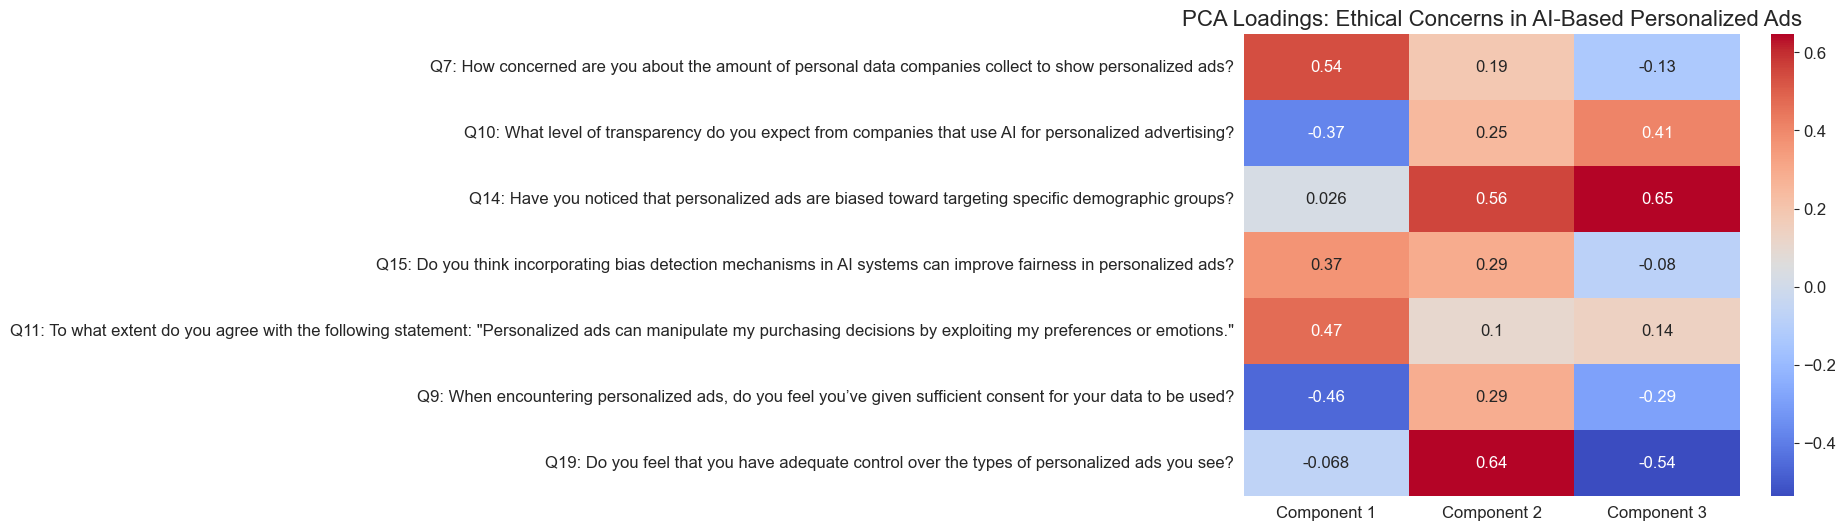

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm")
plt.title("PCA Loadings: Ethical Concerns in AI-Based Personalized Ads")
plt.show()

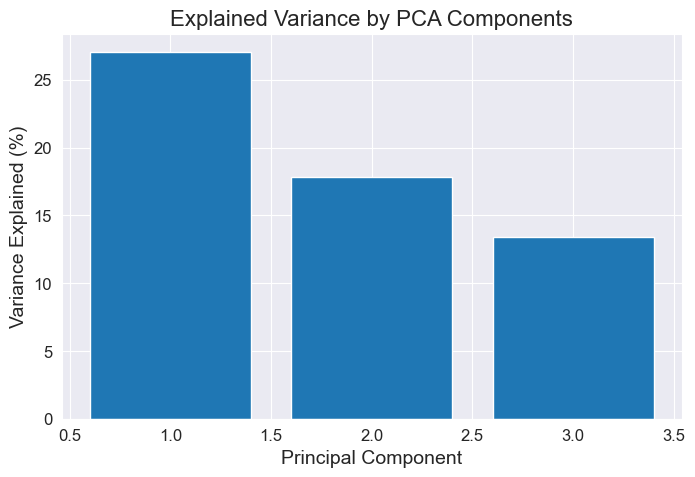

In [71]:
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Explained Variance by PCA Components")
plt.show()

### Component 1 (Privacy, Transparency, and Fairness)

High positive loadings:
Privacy Concerns (0.5359)
Manipulation Concerns (0.4684)
Bias Detection (0.3666)

What it means:

This component represents concerns related to data privacy, bias in advertising, and manipulation through AI-driven ads.
Users who strongly worry about privacy also tend to believe that bias detection tools matter and that personalized ads can manipulate them.
Negative loading on transparency (-0.3749) means that people who expect high transparency tend to worry less about privacy issues.

Conclusion:
This suggests that privacy concerns, fairness concerns, and transparency expectations are linked—aligning with first hypothesis.

### Component 2 (Bias Detection and User Control)

High positive loadings:
Fairness (Bias in Ads) (0.5572)
User Control over Ads (0.6439)

What it means:

This component represents attitudes towards bias in AI advertising and whether people feel in control.
People who believe AI-driven ads are biased toward specific groups also feel that they lack control over the ads they see.
Bias detection mechanisms (0.2928) also contribute here, meaning that belief in bias mitigation is somewhat linked to control.

Conclusion:
This supports the idea that bias concerns and lack of control over personalized ads are closely related—which aligns with parts of the second and third hypotheses.

### Component 3 (Transparency, Fairness, and Control)

High positive loadings:
Transparency Expectations (0.4096)
Fairness (Bias in Ads) (0.6464)

What it means:

People who expect high transparency tend to also perceive bias in ads.
Negative loading on user control (-0.5364) suggests that those who want more transparency don’t necessarily feel in control over their ads.
Negative loading on consent (-0.2879) suggests that consent expectations are weakly linked to transparency.

Conclusion:
This partially supports your third hypothesis, showing that transparency and fairness concerns are interlinked, but transparency does not necessarily mean people feel in control.

# K-Means Clustering

Clustering is an unsupervised learning technique used to group similar data points together. Since we don’t have predefined groups (labels), we use clustering to discover patterns among respondents.

For this study, clustering helps us identify distinct respondent groups based on their ethical concerns regarding AI-driven personalized advertising.

K-Means is chosen because:

It efficiently partitions respondents into K clusters (K=3 here).
It minimizes intra-cluster variance, ensuring respondents within the same cluster are similar.
It works well with PCA-reduced data, making clusters more distinct.

Before clustering, we applied Principal Component Analysis (PCA) to reduce dimensionality. Instead of using all original survey responses, we projected the data onto three principal components (PC1, PC2, PC3) that capture the most variance.

This ensures:

1) Better clustering separation

2) Less noise from redundant information

3) Easier visualization of group differences

In [78]:
# Filter dataset with required columns
df_cluster = df[columns_to_keep].dropna()

In [79]:
# Convert categorical responses into numerical codes
def encode_categories(series):
    return series.astype("category").cat.codes

In [80]:
df_cluster = df_cluster.apply(encode_categories)

In [81]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [82]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

In [83]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

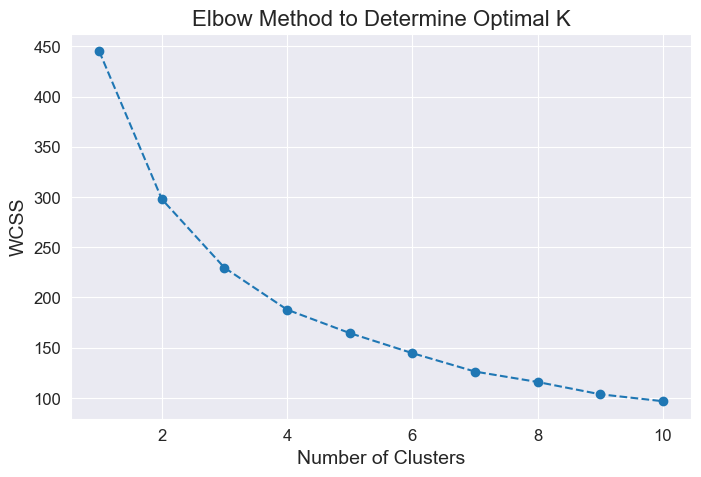

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(principal_components)

In [86]:
df_cluster['Cluster'] = clusters

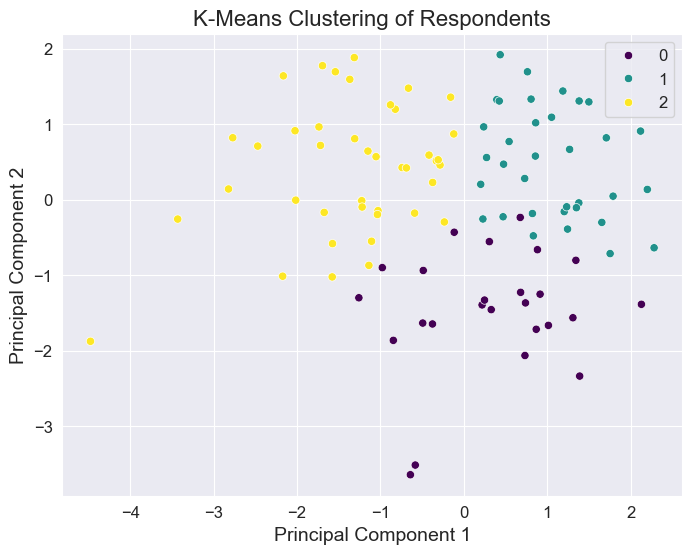

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Respondents')
plt.show()

In [88]:
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2', 'PC3']))

Cluster Centers:
        PC1       PC2       PC3
0  0.318949 -1.406559 -0.445755
1  1.201303  0.527425  0.104520
2 -1.349137  0.401907  0.187015


Each cluster center represents the average position of all respondents in that group.

### PC1 (Privacy vs. Transparency Concerns):
Positive values (Cluster 1) → More privacy concern, lower transparency satisfaction

Negative values (Cluster 2) → Less privacy concern, higher transparency satisfaction

### PC2 (Bias Awareness vs. Trust in AI Ads):
Negative values (Cluster 0) → Higher trust, lower bias concerns

Positive values (Cluster 2) → Higher bias concerns

### PC3 (User Control & Manipulation Perception):
Negative values (Cluster 2) → Feel manipulated, lack control

Positive values (Cluster 1) → Feel in control, less concern

### Cluster 0: Privacy-Conscious but Low Bias Awareness

1) High privacy concern (Q7)

2) Low expectation for transparency (Q10)

3) Do NOT perceive bias in ads (Q14)

4) Moderate concern about manipulation (Q11)

5) Feel they lack control over ads (Q19)

Interpretation:
This group cares a lot about privacy but isn’t very aware of bias issues in AI-driven ads. They feel like they lack control over ads, yet they aren't actively pushing for transparency.

### Cluster 1: Strong Ethical Concern Advocates
1) Highest privacy concern (Q7) 

2) Very high bias awareness (Q14)

3) Strong belief in bias detection as a solution (Q15)

4) Perceive manipulation in personalized ads (Q11)

5) Feel they lack consent over data usage (Q9)

6) Demand higher transparency (Q10)

Interpretation:
This cluster actively opposes unethical AI practices in advertising. They demand more transparency, see bias as a major issue, and feel manipulated by AI-driven ads. They strongly support bias detection mechanisms.

### Cluster 2: Trusting & Less Concerned
1) Lowest privacy concern (Q7)

2) Believe ads are biased, but don’t care much (Q14)

3) Low concerns about manipulation (Q11)

4) Moderate consent satisfaction (Q9)

5) Feel they have control over their ad experience (Q19)

Interpretation:
This cluster is less worried about ethical concerns in AI advertising. They acknowledge bias in ads but don’t feel strongly affected. They believe they have more control over ads, making them more accepting of AI-driven personalization.

In [89]:
for i in range(3):
    print(f"Sample respondents from Cluster {i}:")
    print(df_cluster[df_cluster['Cluster'] == i].head(3))

Sample respondents from Cluster 0:
    Q7: How concerned are you about the amount of personal data companies collect to show personalized ads?  \
5                                                   4                                                         
6                                                   4                                                         
10                                                  4                                                         

    Q10: What level of transparency do you expect from companies that use AI for personalized advertising?  \
5                                                   0                                                        
6                                                   0                                                        
10                                                  0                                                        

    Q14: Have you noticed that personalized ads are biased toward targeting spe

# Association Rule Mining using Apriori and FP-Growth

In [95]:
# Step 1: Convert responses into a list of transactions (ensure all are strings)
transactions = df.apply(lambda row: [str(item) for item in row.dropna()], axis=1).tolist()

In [96]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [97]:
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.2, use_colnames=True)

In [98]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)
rules_apriori = rules_apriori[(rules_apriori['confidence'] > 0.7) & (rules_apriori['lift'] > 1.2)]

In [99]:
print("\n🔹 Top Apriori Rules:\n", rules_apriori.head(10))


🔹 Top Apriori Rules:
                                            antecedents  \
18                                           (Student)   
75                                                 (4)   
88                                                 (5)   
122                                            (Maybe)   
126                                            (Maybe)   
165                                            (Often)   
196  (18-24, Full transparency about how data is co...   
228                                 (18-24, Sometimes)   
235                                       (Student, 3)   
280                                         (4, 18-24)   

                                 consequents  antecedent support  \
18                                   (18-24)            0.419643   
75   (Yes, they influence my decisions more)            0.428571   
88                         (Yes, frequently)            0.455357   
122                               (Not Sure)            0.276786  

### A. Student Users (Student → 18-24, Confidence = 82.98%)
Insight: A significant portion of students belong to the 18-24 age group.

Interpretation: Since this demographic is highly digitally active, their responses to personalized ads could shape advertising policies aimed at young adults.

### B. Exposure to Personalized Ads → Decision Influence
Rule: (Ad Exposure Frequency = "4") → (Ads influence decisions more) (Confidence = 72.9%)

Rule: (Ad Exposure Frequency = "5") → (Yes, frequently) (Confidence = 70.5%)

Insight: The more frequently users see personalized ads, the more likely they are to acknowledge their influence.

Implication: This supports the argument that AI-driven ads can shape consumer choices. This raises concerns about manipulative advertising and highlights the need for transparency.

## C. Uncertainty & Lack of Awareness

Rule: (Maybe) → (Not Sure) (Confidence = 74.1%)

Rule: (Maybe) → (Rarely) (Confidence = 83.8%)

Insight: Users who are uncertain (“Maybe”) about AI-driven ad transparency tend to be unsure or disengaged when asked about its influence.

Implication: This suggests a lack of awareness or understanding about how AI-driven advertising affects them. Policies promoting clearer user education and consent mechanisms are necessary.

### D. Transparency & Trust in AI Ads
Rule: (Full transparency about data collection) → (More engagement with ads) (Confidence = 82.8%)

Insight: Users who are aware of how AI collects and uses their data are more likely to engage.

Implication: Transparent AI advertising builds trust and can encourage ethical data-sharing behaviors.

### E. Age and Decision Influence
Rule: (18-24, Sometimes engage with ads) → (More likely to be influenced) (Confidence = 87.0%)

Insight: The 18-24 age group is highly engaged with personalized ads, even if they don’t actively seek them out.

Implication: This suggests that younger audiences are more susceptible to targeted advertising, highlighting a need for responsible AI-driven ad strategies.

In [100]:
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.2, use_colnames=True)

In [102]:
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)
rules_fp = rules_fp[(rules_fp['confidence'] > 0.7) & (rules_fp['lift'] > 1.2)]

In [103]:
print("\n🔹 Top FP-Growth Rules:\n", rules_fp.head(10))


🔹 Top FP-Growth Rules:
                                            antecedents  \
291                               (Yes, Frequently, 3)   
676                       (Occasionally, Not Sure, No)   
692                  (Occasionally, Not Sure, No, Yes)   
696                       (Occasionally, Not Sure, No)   
804  (Full transparency about how data is collected...   
838  (3, Yes, Not Sure, Full transparency about how...   
842  (3, Not Sure, Full transparency about how data...   
924          (Occasionally, Yes, Frequently, Not Sure)   
972  (Yes, they influence my decisions more, Not Su...   
999                     (Yes, Frequently, Not Sure, 3)   

                                 consequents  antecedent support  \
291  (Yes, they influence my decisions more)            0.464286   
676                                      (3)            0.321429   
692                                      (3)            0.303571   
696                                 (Yes, 3)            0.321429

### A. High Exposure + Trust in AI Ads → Strongest Influence
Rule: (Ad Frequency = "3", "Yes, Frequently") → (More influence) (Confidence = 73.1%)

Insight: If users frequently see personalized ads and believe in AI-driven ads, they strongly acknowledge its influence.
    
Implication: AI-powered ads can reinforce purchasing decisions over time.

### B. Uncertainty in AI Ads → Lower Trust & Engagement
Rule: (Occasionally see ads + Not Sure if AI Ads are Ethical) → (Disengagement) (Confidence = 85.2%)

Insight: Users who don’t see AI-driven ads often and are unsure of its ethics tend to ignore personalized advertising.
    
Implication: This group may need educational campaigns about AI transparency and ethical advertising practices.

### C. Transparency Matters Most for Ethical Ad Engagement
Rule: (Belief in Full Transparency) → (Occasionally Engages) (Confidence = 82.7%)

Insight: Users who know exactly how their data is collected are more comfortable engaging with ads.

Implication: AI-driven ads should clearly communicate data usage policies to gain user trust.